In [4]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

In [5]:
a, xmin = 2.5 , 1.0
N = 10000

# generates random variates of power law distribution
xx = list(powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N))


In [37]:
max(xx)

1063.8033423107618

In [38]:
min(xx)

1.0000999691386503

# 1-Plotting linear histogram

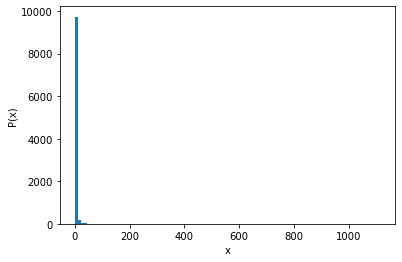

In [6]:
plt.hist(xx,bins=100)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

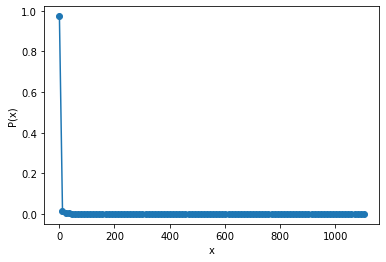

In [10]:
ybinLin,xbinLin=np.histogram(xx,bins=100)
ynorm=[float(i)/sum(ybinLin) for i in ybinLin]
# On enlève la valeur finale car np.histogram met les valeurs initiales
# et finale pour chaque interval de x et pour y la valeur de l'intervale
# il faut donc enlever la premiere ou la dernière valeur de xbinLin
plt.plot(xbinLin[:-1],ynorm,'o-')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 2-Plotting log-log histogram

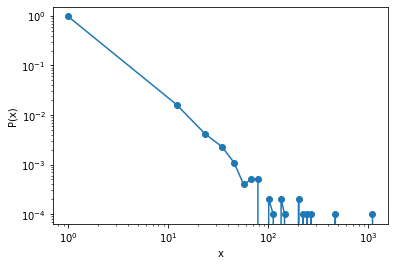

In [12]:
plt.loglog(xbinLin[:-1],ynorm,'o-')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 3- Plotting cumulative distribution

In [14]:
ycum=[sum(ynorm[i:]) for i in range(len(ynorm))]

In [17]:
xbinLin[:-1]

array([1.00002225e+00, 1.21273246e+01, 2.32546270e+01, 3.43819294e+01,
       4.55092317e+01, 5.66365341e+01, 6.77638365e+01, 7.88911389e+01,
       9.00184412e+01, 1.01145744e+02, 1.12273046e+02, 1.23400348e+02,
       1.34527651e+02, 1.45654953e+02, 1.56782255e+02, 1.67909558e+02,
       1.79036860e+02, 1.90164163e+02, 2.01291465e+02, 2.12418767e+02,
       2.23546070e+02, 2.34673372e+02, 2.45800674e+02, 2.56927977e+02,
       2.68055279e+02, 2.79182582e+02, 2.90309884e+02, 3.01437186e+02,
       3.12564489e+02, 3.23691791e+02, 3.34819093e+02, 3.45946396e+02,
       3.57073698e+02, 3.68201001e+02, 3.79328303e+02, 3.90455605e+02,
       4.01582908e+02, 4.12710210e+02, 4.23837512e+02, 4.34964815e+02,
       4.46092117e+02, 4.57219420e+02, 4.68346722e+02, 4.79474024e+02,
       4.90601327e+02, 5.01728629e+02, 5.12855931e+02, 5.23983234e+02,
       5.35110536e+02, 5.46237839e+02, 5.57365141e+02, 5.68492443e+02,
       5.79619746e+02, 5.90747048e+02, 6.01874350e+02, 6.13001653e+02,
      

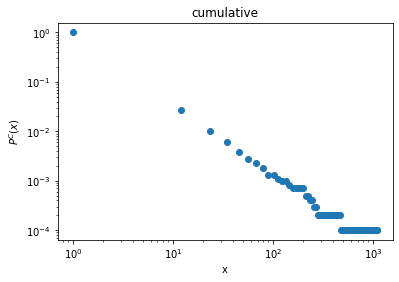

In [16]:
plt.loglog(xbinLin[:-1],ycum,'o')
plt.title('cumulative')
plt.xlabel('x')
plt.ylabel('$P^C(x)$')
plt.show()

# 4- Plotting binned distribution


In [18]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    #density = True fait la bonne normalisation
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

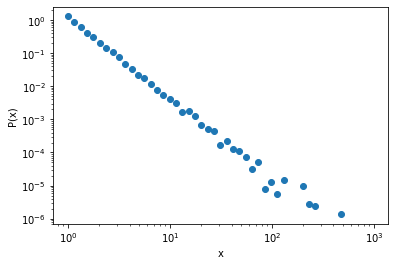

In [19]:
y,x=logBinning(np.array(xx),50)
plt.loglog(x,y,'o')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 5-calculating power-law fit

In [20]:
def powerLaw(x, a, b):
    return b*x**(a)

-2.5648121873676577


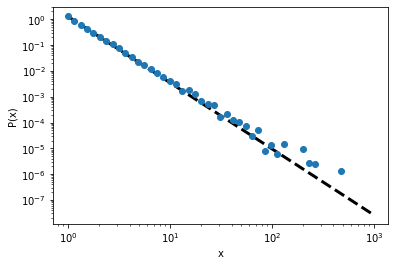

In [21]:
fitx=[i for (i,j) in zip(x,y) if i<100]
fity=[j for (i,j) in zip(x,y) if i<100]
popt, pcov = curve_fit(powerLaw, fitx, fity)  
print (popt[0])
plt.loglog(sorted(x), powerLaw(sorted(x), *popt), '--',c='k',linewidth=3)

plt.loglog(x,y,'o')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 6-Plot ranking

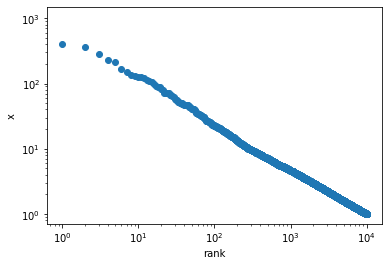

In [70]:
plt.loglog(range(len(xx)),sorted(xx,reverse=True),'o')

plt.xlabel('rank')
plt.ylabel('x')
plt.show()

# BIVARIATE STATISTICS

xx is distributed according to a power-law distribution. yy is derived from a uniform distribution. I have a set of bivariate variables: (x,y)

In [75]:
yy=[random.uniform(0,1) for i in xx]

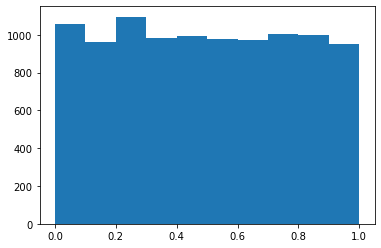

In [78]:
plt.hist(yy)
plt.show()

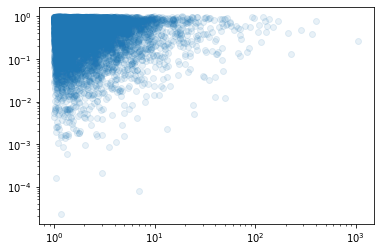

In [86]:
# simple plot of the (x,y) couples
plt.loglog(xx,yy,'o',alpha=0.1)
plt.show()

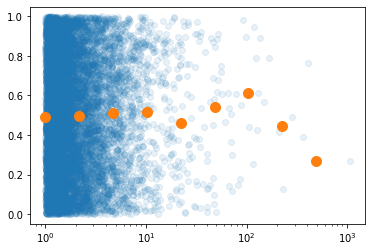

In [98]:
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=10)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.semilogx(xx,yy,'o',alpha=0.1)
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)
plt.show()

In [99]:
bin_stdevs, _, _ = scipy.stats.binned_statistic(xx, yy, 
                                    statistic='std', 
                                    bins=logBins)

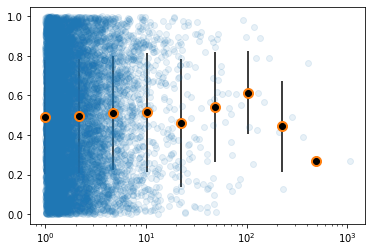

In [112]:
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=10)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.semilogx(xx,yy,'o',alpha=0.1)
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)

plt.errorbar(xbin[:-1], ybin, bin_stdevs, fmt='o',color="k")
plt.show()